# Perkenalan

Nama/Batch =  Sandika/008

# Import Pustaka

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mutual_info_score

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Data Loading

In [ ]:
df_dummy= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
df_dummy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df_dummy.shape

(299, 13)

# EDA

In [ ]:
df= df_dummy.copy()

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Tidak ditemukan data duplikat dan juga memiliki value NaN

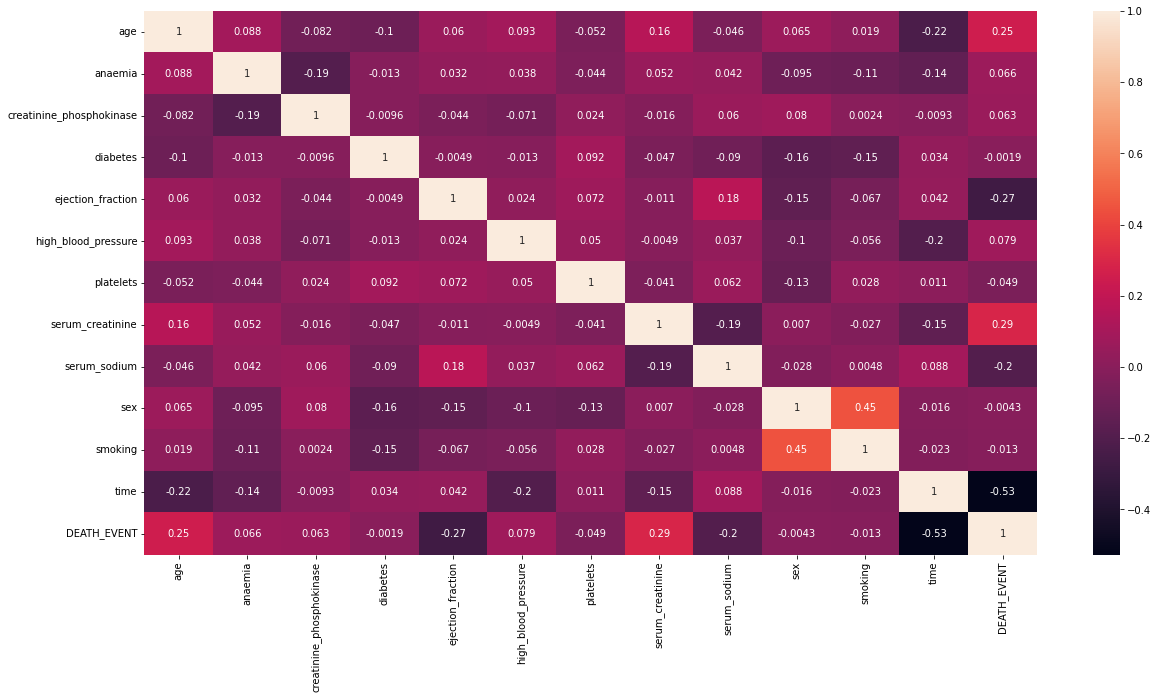

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr().sort_values('DEATH_EVENT', ascending=False, key=abs).index

Index(['DEATH_EVENT', 'time', 'serum_creatinine', 'ejection_fraction', 'age',
       'serum_sodium', 'high_blood_pressure', 'anaemia',
       'creatinine_phosphokinase', 'platelets', 'smoking', 'sex', 'diabetes'],
      dtype='object')

urutan parameter yang paling berpengaruh terhadap kolom 'DEATH_EVENT'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

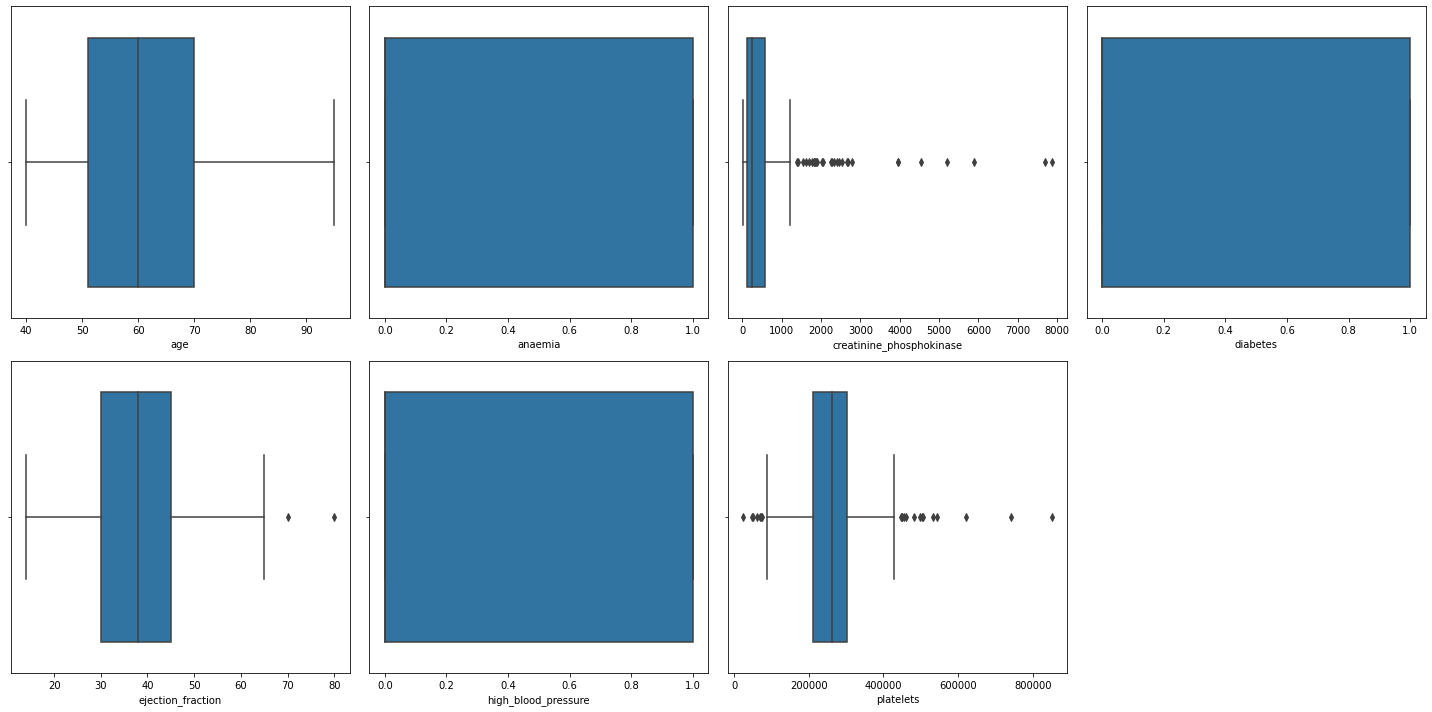

In [ ]:
plt.figure(figsize = (20, 10))
plotnumber = 1

for column in df:
    if plotnumber <= 7:
        ax = plt.subplot(2, 4, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 10)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

ditemukan beberapa kolom yang memiliki outlier

# Data Preprocessing

In [ ]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df[['DEATH_EVENT']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

In [ ]:
kat = [col for col in X_train.columns if X_train[col].dtypes == 'O']
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print('Numeric Columns:', num)
print('categorical Columns:', kat)

Numeric Columns: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
categorical Columns: []


data tidak memiliki kolom kategori

# Model Definition

Proses pembuatan preprocessor pipeline

In [ ]:
pipeline_rf = Pipeline([
    ('algo_rf',RandomForestClassifier())
])

In [ ]:
pipeline_ab = Pipeline([
    ('algo_ab',AdaBoostClassifier())
])

Proses pemodelan random forest dan ada boost dengan pipeline

In [ ]:
parameter_ab= {
    'algo_ab__learning_rate': [0.1, 1],
    'algo_ab__n_estimators': [10,50,100]
}

In [ ]:
parameter_rf= {
    'algo_rf__max_depth': [5, 10, 20],
    'algo_rf__min_samples_split': [3, 30],
    'algo_rf__min_samples_leaf' : [5, 10],
    'algo_rf__n_estimators': [50, 100, 200]
}

proses penentuan hyper parameter tuning

# Model Training

In [ ]:
model_ab=GridSearchCV(pipeline_ab, parameter_ab, cv=3, n_jobs=-1, verbose=1)
model_ab.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('algo_ab', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'algo_ab__learning_rate': [0.1, 1],
                         'algo_ab__n_estimators': [10, 50, 100]},
             verbose=1)

In [ ]:
model_rf= GridSearchCV(pipeline_rf, parameter_rf, cv=3, n_jobs=-1, verbose=1)
model_rf.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('algo_rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo_rf__max_depth': [5, 10, 20],
                         'algo_rf__min_samples_leaf': [5, 10],
                         'algo_rf__min_samples_split': [3, 30],
                         'algo_rf__n_estimators': [50, 100, 200]},
             verbose=1)

# Model Evaluation

## Ada Boost

In [ ]:
model_ab.score(X_test, y_test)

0.85

In [ ]:
y_pred_ab = model_ab.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        41
           1       0.81      0.68      0.74        19

    accuracy                           0.85        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.85      0.85      0.85        60



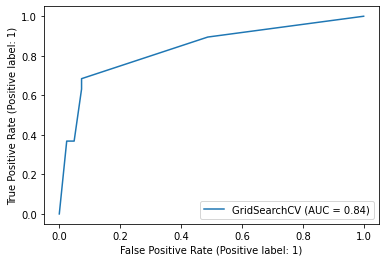

In [ ]:
RocCurveDisplay.from_estimator(model_ab, X_test, y_test)

In [ ]:
model_ab.best_params_

{'algo_ab__learning_rate': 0.1, 'algo_ab__n_estimators': 10}

1. nilai dari precisionnya sebesar 0.81, recall 0.68, f1 0.74, dan ROC AUC sebesar 0.84
2. Parameter terbaik adalah
- learning rate : 0.1
- n estimator : 10 

# Random Forest

In [ ]:
model_rf.score(X_test, y_test)

0.85

In [ ]:
y_pred_rf = model_ab.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        41
           1       0.81      0.68      0.74        19

    accuracy                           0.85        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.85      0.85      0.85        60



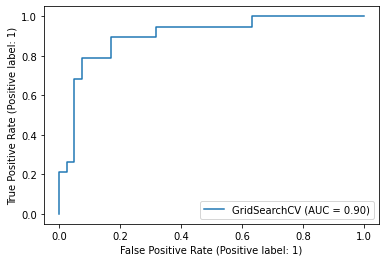

In [ ]:
RocCurveDisplay.from_estimator(model_rf, X_test, y_test)

In [ ]:
model_rf.best_params_

{'algo_rf__max_depth': 5,
 'algo_rf__min_samples_leaf': 10,
 'algo_rf__min_samples_split': 3,
 'algo_rf__n_estimators': 100}

1. nilai dari precisionnya sebesar 0.81, recall 0.68, f1 0.74, dan ROC AUC sebesar 0.9
2. Parameter terbaik adalah
- max_depth: 5
- min_samples_leaf: 10,
- min_samples_split: 3,
- n_estimators: 100

# Model Inference

In [ ]:
data_inference =X_train.sample(2)

In [ ]:
data_inference.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147
263,68.0,1,157,1,60,0,208000.0,1.0,140,0,0,237


In [ ]:
pipeline_rf_best = Pipeline([
    ('algo_rf',RandomForestClassifier(n_estimators= 100, max_depth = 5, min_samples_split= 3, min_samples_leaf=10)
     )
])

In [ ]:
pipeline_ab_best = Pipeline([
    ('algo_rf',AdaBoostClassifier(n_estimators= 10, learning_rate=0.1)
     )
])

In [ ]:
pipeline_rf_best.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('algo_rf',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                        min_samples_split=3))])

In [ ]:
pipeline_ab_best.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('algo_rf',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=10))])

In [ ]:
Random_forest_prediction=pipeline_rf_best.predict(data_inference)

In [ ]:
Ada_boost_prediction=pipeline_rf_best.predict(data_inference)

In [ ]:
data_inference['Random forest prediction']=Random_forest_prediction
data_inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Random forest prediction
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0
263,68.0,1,157,1,60,0,208000.0,1.0,140,0,0,237,0


In [ ]:
data_inference['Ada boost prediction']=Ada_boost_prediction
data_inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Random forest prediction,Ada boost prediction
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0,0
263,68.0,1,157,1,60,0,208000.0,1.0,140,0,0,237,0,0


# Kesimpulan

1. Karena banyaknya kolom dengan banyak jumlah outliers maka metode Random Forest adalah metode yang terbaik dikarenakan metode ini tidak sensitif terhadap outlier dan juga Random Forest memiliki ROC AUC score yang lebih besar dibandingkan AdaBoost

2. Parameter terbaik untuk digunakan di metode Random Forest adalah:
- n_estimators= 100 
- max_depth = 5
- min_samples_split= 3
- min_samples_leaf=10

---
🥰🥰🥰🥰🥰SEKIAN TERIMAKASIH🥰🥰🥰🥰🥰

catatan: pemilihan variabel bisa saja salah dikarenakan keterbatasan device yang digunakan ✌